# Neural Network Math: Activation Functions

### CENTER ALL IMAGES

This blog post will be the first part of a series called "Neural Network Math", where each post will reveal the mathematics used to achieve the desired results with neural networks. To start, only the basics will be covered, but as the posts progress, so will the complexity. The goal of these posts is to peak under the hood of the neural networks to see what actually happens. For example, we can all learn to drive a car. Press the accelerator, turn the wheel, use breaks when necessary (obviously oversimplified), but not everyone understands exactly what happens inside the car that makes it accelerate or decelerate. How does the engine work and where does the gas travel throughout the car? These are the types of questions I hope to find the answers to (unfortunately, I will not be telling you how a car works).

1. Activation Functions
    1. Review
    2. The Hyperbolic Tangent Function
    3. Derivative of Tanh
    4. The Sigmoid Function
    5. Derivative of the Sigmoid Function
    6. Plotting Activation Functions

## Review

First off, a quick review of derivatives may be needed. A derivative is simply a fancy name for the slope. Everyone has heard of the slope of a function in middle school math class. When looking at any given point on a functions graph, the derivative is the slope of the tangent line at that given point. Below is the code for a visual of this concept.

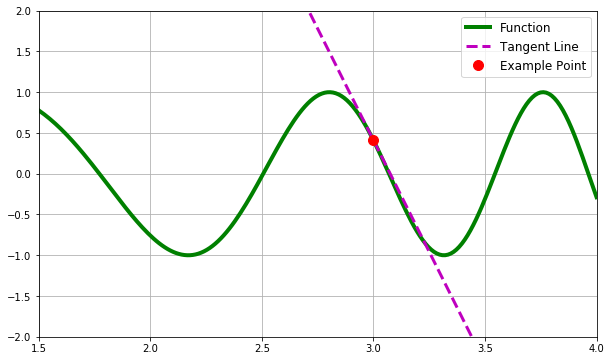

In [4]:
import numpy as np
import matplotlib.pyplot as plt

def f(x):
    return np.sin(np.power(x, 2))

x = np.linspace(1.5,4,200)
y = f(x)

a = 3 
h = 0.001 # h approaches zero
derivative = (f(a + h)- f(a))/h # difference quotient
tangent = f(a) + derivative * (x - a) # finding the tangent line

plt.figure(figsize=(10,6))

plt.ylim(-2,2)
plt.xlim(1.5, 4)

plt.plot(x, y, linewidth=4, color='g', label='Function')
plt.plot(x, tangent, color='m', linestyle='--', linewidth='3', label='Tangent Line')
plt.plot(a, f(a), 'o', color='r', markersize=10, label='Example Point')

plt.legend(fontsize=12)
plt.grid(True)
plt.show()

Everyone learns the formula for the slope of a line in middle school. The slope formula is commonly remembered as "rise over run", or the change in y divided by the change in x. A derivative is the same thing, the change in in y over the change in x, this can be written like this:

<img src="https://latex.codecogs.com/gif.latex?\dpi{150}&space;Slope&space;=&space;\frac{rise}{run}&space;=&space;\frac{\Delta&space;y}{\Delta&space;x}" style='display:block; margin: auto;'/>

To find the derivative of a function, we can use the difference quotient. The difference quotient calculates the slope of the secant line through two points on a function's graph. The two points would be x and (x + h). As the change in x approaches zero, the secant line will get increasingly closer to the tangent line, therefore becoming closer to the instantaneous rate of change, or the slope of a single point. The difference quotient is written like this:

<img src="https://latex.codecogs.com/png.latex?\dpi{150}&space;f'(x)&space;=&space;\lim_{\Delta&space;x&space;\rightarrow&space;0}&space;\frac{f(x&space;&plus;&space;\Delta&space;x)&space;-&space;f(x)}{\Delta&space;x},&space;\&space;\Delta&space;x\neq&space;0" title="f'(x) = \lim_{\Delta x \rightarrow 0} \frac{f(x + \Delta x) - f(x)}{\Delta x}, \ \Delta x\neq 0" />

Below is an example of how the difference quotient is used to find the derivative of a function. <b>Note:</b> "delta x" has been substituted with "h" for simplicity. The example function will be "x squared".

<img src="https://latex.codecogs.com/png.latex?\inline&space;\dpi{150}&space;f(x)&space;=&space;x^2&space;\\&space;\newline&space;\indent&space;f'(x)&space;=&space;\frac{(x&plus;h)^2-x^2}{h}&space;=&space;\frac{x^2&plus;h^2&plus;2xh&space;-&space;x^2}{h}&space;=&space;2x&plus;h&space;=&space;2x" title="f(x) = x^2 \\ \newline \indent f'(x) = \frac{(x+h)^2-x^2}{h} = \frac{x^2+h^2+2xh - x^2}{h} = 2x+h = 2x" />


To find the derivative of x squared, we would plug (x + h) into the function, then substract f(x), which was given as x squared. The limit of the difference quotient is the instantaneous rate of change. In teh difference quotient, "h" will approach zero, but will never become zero. In the example given below, we assume that "h" approaches close enough to zero to be treated as if it were zero, and therefore we can get rid of the final "h" as it would be the equivalent to adding zero to 2x. The example below uses the difference quotient to show that the derivative of x squared is 2x.

## The Hyperbolic Tangent Function

```python
# EXAMPLE FUNCTION
def tanh(x, deriv = False):
    if deriv == True:
        return (1 - (tanh(x)**2)
    return (np.exp(x) - np.exp(-x)) / (np.exp(x) + np.exp(-x))
    # return np.tanh(x)
```

The <b>hyperbolic tangent</b> function is a nonlinear activation function commonly used in a lot of simpler neural network implementations. Nonlinear activation functions are typically prefered over linear activation functions because they can fit datasets better and are better at generalizing. The tanh function is typically a better choice than the sigmoid function (AKA logistic function) because while both share a sigmoidal curve, or S-shaped curve, the sigmoid function ranges from [0 to 1], while the tanh function ranges from [-1 to 1]. This greater range allows the tanh function to map negative inputs to negative outputs, while near-zero inputs will be mapped to near-zero outputs. Additonally, the tanh function makes data more centered around zero, which creates stronger and more useful gradients. The hyperbolic tangent function is simply less restricted than the logistic function.

Similar to the tangent function (sine over cosine), the hyperbolic tangent function is equal to the hyperbolic sine over the hyperbolic cosine.

<img src="https://latex.codecogs.com/png.latex?\dpi{150}&space;tanh(x)&space;=&space;\frac{sinh(x)}{cosh(x)}&space;\&space;=&space;\&space;\frac{e^{x}&space;-&space;e^{-x}}{e^{x}&space;&plus;&space;e^{-x}}" title="tanh(x) = \frac{sinh(x)}{cosh(x)} \ = \ \frac{e^{x} - e^{-x}}{e^{x} + e^{-x}}">

The hyperbolic sine and the hyperbolic cosine can be written like this:

<img src="https://latex.codecogs.com/gif.latex?\dpi{150}&space;sinh(x)&space;=&space;\frac{e^{x}-e^{-x}}{2}&space;\&space;\&space;,&space;\&space;cosh(x)&space;=&space;\frac{e^{x}&plus;e^{-x}}{2}" title="sinh(x) = \frac{e^{x}-e^{-x}}{2} \ \ , \ cosh(x) = \frac{e^{x}+e^{-x}}{2}" />

We can write the hyperbolic sine over the hyperbolic cosine. This will create a fraction divided by another fraction. This is the same as the numerator fraction multiplied by the denominator fraction's reciprocal. This is commonly remembered as "Keep, Change, Flip". After multiplying the two fractions, we will be able to factor out a two from the top and bottom. This will leave us with the hyperbolic tangent function.

<img src="https://latex.codecogs.com/png.latex?\inline&space;\dpi{150}&space;\frac{sinh(x)}{cosh(x)}=&space;\frac{\frac{e^{x}-e^{-x}}{2}}{\frac{e^{x}&plus;e^{-x}}{2}}&space;=&space;\frac{e^{x}-e^{-x}}{2}&space;\times&space;\frac{2}{e^{x}&plus;e^{-x}}&space;=&space;\frac{2(e^{x}-e^{-x})}{2(e^{x}&plus;e^{-x})}&space;=&space;\frac{\cancel&space;2(e^{x}-e^{-x})}{\cancel&space;2(e^{x}&plus;e^{-x})}&space;=&space;\frac{e^{x}-e^{-x}}{e^{x}&plus;e^{-x}}" title="\frac{sinh(x)}{cosh(x)}= \frac{\frac{e^{x}-e^{-x}}{2}}{\frac{e^{x}+e^{-x}}{2}} = \frac{e^{x}-e^{-x}}{2} \times \frac{2}{e^{x}+e^{-x}} = \frac{2(e^{x}-e^{-x})}{2(e^{x}+e^{-x})} = \frac{\cancel 2(e^{x}-e^{-x})}{\cancel 2(e^{x}+e^{-x})} = \frac{e^{x}-e^{-x}}{e^{x}+e^{-x}}" />

## Derivative of Tanh

Now let's find the derivative of the hyperbolic tangent function. We know that the hyperbolic tangent function is written as the hyperbolic sine over the hyperbolic cosine. When dealing with the derivative of a quotient of two functions, we can use the quotient rule. The quotient rule formula uses the function in the numerator as f(x) and the function in the denominator as g(x). The quotient rule formula is written as:

<img src="https://latex.codecogs.com/png.latex?\dpi{150}&space;\frac{\mathrm{d}&space;}{\mathrm{d}&space;x}\left&space;[&space;\frac{f(x)}{g(x)}&space;\right&space;]&space;=&space;\frac{g(x)f'(x)&space;-&space;f(x)g'(x)}{(g(x))^{2}}" title="\frac{\mathrm{d} }{\mathrm{d} x}\left [ \frac{f(x)}{g(x)} \right ] = \frac{g(x)f'(x) - f(x)g'(x)}{(g(x))^{2}}" />

Using the quotient rule follows the steps below:
1. Take the product of the function f(x) and the derivative of g(x).
2. Take the product of the function g(x) and the derivatve of f(x).
3. Take the difference between the first product and the second product.
4. Divide by g(x) squared.

Now, if we apply the quotient rule to find the derivative of the hyperbolic tangent function, then it would look something like this:
<img src="https://latex.codecogs.com/png.latex?\inline&space;\dpi{150}&space;\frac{\mathrm{d}&space;}{\mathrm{d}&space;x}&space;tanh(x)&space;=&space;\frac{\mathrm{d}&space;}{\mathrm{d}&space;x}(\frac{sinh(x)}{cosh(x)})&space;=&space;\frac{cosh(x)\cdot&space;sinh'(x)&space;-&space;sinh(x)\cdot&space;cosh'(x)}{cosh(x)^{2}}" title="\frac{\mathrm{d} }{\mathrm{d} x} tanh(x) = \frac{\mathrm{d} }{\mathrm{d} x}(\frac{sinh(x)}{cosh(x)}) = \frac{cosh(x)\cdot sinh'(x) - sinh(x)\cdot cosh'(x)}{cosh(x)^{2}}" />

After doing this, we run into another problem. What are the derivatives of the sinh and cosh functions? To solve this, we will first need to find the deriative of e<sup>x</sup> and e<sup>-x</sup>. Recall, the functions sinh(x) and cosh(x) contain e<sup>x</sup> and e<sup>-x</sup>. e<sup>x</sup> is known to be a very special function because its derivative is simply itself. Yes, the derivative of e<sup>x</sup> equals the function value for all possible points. Why is this true though?

### Derivative of e<sup>x</sup>

Let's start to take the derivative of e<sup>x</sup>. First, we will use the difference quotient and plug in e<sup>x</sup> for f(x).
<a href="https://www.codecogs.com/eqnedit.php?latex=\dpi{150}&space;\frac{\mathrm{d}&space;}{\mathrm{d}&space;x}e^{x}&space;=&space;\lim_{h&space;\to&space;0}\frac{e^{(x&plus;h)}-e^{x}}{h}" target="_blank"><img src="https://latex.codecogs.com/png.latex?\dpi{150}&space;\frac{\mathrm{d}&space;}{\mathrm{d}&space;x}e^{x}&space;=&space;\lim_{h&space;\to&space;0}\frac{e^{(x&plus;h)}-e^{x}}{h}" title="\frac{\mathrm{d} }{\mathrm{d} x}e^{x} = \lim_{h \to 0}\frac{e^{(x+h)}-e^{x}}{h}" /></a>

Using the product rule of exponents, we can split up the e<sup>(x+h)</sup> and make things a bit easier to deal with. After doing this, we will be able to factor out an e<sup>x</sup> from the numerator and put it on the other side of the limit.

<a href="https://www.codecogs.com/eqnedit.php?latex=\dpi{150}&space;\lim_{h&space;\to&space;0}\frac{e^{(x&plus;h)}-e^{x}}{h}&space;=&space;\lim_{h&space;\to&space;0}\frac{e^{x}e^{h}-e^{x}}{h}&space;=&space;\lim_{h&space;\to&space;0}\frac{e^{x}(e^{h}-1)}{h}&space;=&space;e^{x}\lim_{h&space;\to&space;0}\frac{(e^{h}-1)}{h}" target="_blank"><img src="https://latex.codecogs.com/png.latex?\dpi{150}&space;\lim_{h&space;\to&space;0}\frac{e^{(x&plus;h)}-e^{x}}{h}&space;=&space;\lim_{h&space;\to&space;0}\frac{e^{x}e^{h}-e^{x}}{h}&space;=&space;\lim_{h&space;\to&space;0}\frac{e^{x}(e^{h}-1)}{h}&space;=&space;e^{x}\lim_{h&space;\to&space;0}\frac{(e^{h}-1)}{h}" title="\lim_{h \to 0}\frac{e^{(x+h)}-e^{x}}{h} = \lim_{h \to 0}\frac{e^{x}e^{h}-e^{x}}{h} = \lim_{h \to 0}\frac{e^{x}(e^{h}-1)}{h} = e^{x}\lim_{h \to 0}\frac{(e^{h}-1)}{h}" /></a>

Now things may start to look weird. Where do we go from here? Are we stuck? Before we progress any further, let's take a look at the definition of Euler's number (e). Euler's number can be defined as:

<img src="https://latex.codecogs.com/png.latex?\dpi{150}&space;e&space;=&space;\lim_{n\to&space;\infty}(1&space;&plus;&space;\frac{1}{n})^{n}" title="e = \lim_{n\to \infty}(1 + \frac{1}{n})^{n}" />

Here comes the really cool part. If we rewrite the definition of e in terms of h (plug in 1/h for "n"), it would look like this:

<img src="https://latex.codecogs.com/png.latex?\dpi{150}&space;e&space;=&space;\lim_{h\to&space;\infty}(1&space;&plus;&space;h)^{\frac{1}{h}}" title="e = \lim_{h\to \infty}(1 + h)^{\frac{1}{h}}" />


Looking back at where we last left off for the derivative of e<sup>x</sup>, we notice that we have an e<sup>h</sup>, so we can write our definition of "e" and raise it to the power of "h".
<img src="https://latex.codecogs.com/png.latex?\dpi{150}&space;[(1&space;&plus;&space;h)^{\frac{1}{h}}]^{h}" title="[(1 + h)^{\frac{1}{h}}]^{h}" />

Using the power rule, we can simplify this expression further. For reference, the power rule states that:

<img src="https://latex.codecogs.com/png.latex?\dpi{150}&space;(a^{b})^{c}&space;=&space;a^{bc}" title="(a^{b})^{c} = a^{bc}" />

Now if we apply this to our definition of "e" raised to the power of "h", all of the exponents would cancel eachother out. Remember that anything raised to the power of one will always equal itself. This process will look like this:

<img src="https://latex.codecogs.com/png.latex?\dpi{150}&space;[(1&space;&plus;&space;h)^{\frac{1}{h}}]^{h}&space;=&space;(1&space;&plus;&space;h)^{\frac{1}{h}h}&space;=&space;(1&plus;h)^{\frac{1}{h}\times&space;\frac{h}{1}}&space;=&space;(1&space;&plus;&space;h)^{\frac{h}{h}}&space;=&space;(1&plus;h)" title="[(1 + h)^{\frac{1}{h}}]^{h} = (1 + h)^{\frac{1}{h}h} = (1+h)^{\frac{1}{h}\times \frac{h}{1}} = (1 + h)^{\frac{h}{h}} = (1+h)" />

Now that we know what e<sup>h</sup> equals, we can go back to finding the derivative of e<sup>x</sup> and rewrite it by replacing e<sup>h</sup> with its definition like so:
<img src="https://latex.codecogs.com/png.latex?\dpi{150}&space;\frac{\mathrm{d}&space;}{\mathrm{d}&space;x}e^{x}&space;=&space;e^{x}\lim_{h&space;\to&space;0}\frac{(e^{h}-1)}{h}&space;=&space;e^{x}\lim_{h&space;\to&space;0}\frac{(1&plus;h)-1}{h}&space;=&space;e^{x}\lim_{h&space;\to&space;0}\frac{h}{h}" title="\frac{\mathrm{d} }{\mathrm{d} x}e^{x} = e^{x}\lim_{h \to 0}\frac{(e^{h}-1)}{h} = e^{x}\lim_{h \to 0}\frac{(1+h)-1}{h} = e^{x}\lim_{h \to 0}\frac{h}{h}" />

We can see that the limit is equal to one. h/h equals one, and as h approaches zero, it will always equal one. The derivative of e<sup>x</sup> becomes this:

<img src="https://latex.codecogs.com/png.latex?\dpi{150}&space;\frac{\mathrm{d}&space;}{\mathrm{d}&space;x}e^{x}&space;=&space;e^{x}\lim_{h&space;\to&space;0}\frac{h}{h}&space;=&space;e^{x}(1)&space;=&space;e^{x}" title="\frac{\mathrm{d} }{\mathrm{d} x}e^{x} = e^{x}\lim_{h \to 0}\frac{h}{h} = e^{x}(1) = e^{x}" />

### Derivative of e<sup>-x</sup>

Finding the derivative of e<sup>-x</sup> will be much easier now that we know the derivative of e<sup>x</sup>. We could solve the derivative of e<sup>-x</sup> the same way that we solved the derivative of e<sup>x</sup>, but I want to show a different way where we use the quotient rule. First things first, we will need to rewrite e<sup>-x</sup> like this:

<img src="https://latex.codecogs.com/png.latex?\dpi{150}&space;\frac{\mathrm{d}&space;}{\mathrm{d}&space;x}e^{-x}&space;=&space;\frac{\mathrm{d}&space;}{\mathrm{d}&space;x}(\frac{1}{e^{x}})" title="\frac{\mathrm{d} }{\mathrm{d} x}e^{-x} = \frac{\mathrm{d} }{\mathrm{d} x}(\frac{1}{e^{x}})" />

Using the quotient rule that was mentioned above, the derivative of e<sup>-x</sup> can be written like this:

<img src="https://latex.codecogs.com/png.latex?\dpi{150}&space;\frac{\mathrm{d}&space;}{\mathrm{d}&space;x}(\frac{1}{e^{x}})&space;=&space;\frac{\frac{\mathrm{d}&space;}{\mathrm{d}&space;x}1(e^{x})&space;-&space;(1)\frac{\mathrm{d}&space;}{\mathrm{d}&space;x}e^{x}}{(e^{x})^{2}}&space;=&space;\frac{-1(e^{x})}{(e^{x})^{2}}&space;=&space;\frac{-e^{x}}{(e^{x})^{2}}" title="\frac{\mathrm{d} }{\mathrm{d} x}(\frac{1}{e^{x}}) = \frac{\frac{\mathrm{d} }{\mathrm{d} x}1(e^{x}) - (1)\frac{\mathrm{d} }{\mathrm{d} x}e^{x}}{(e^{x})^{2}} = \frac{-1(e^{x})}{(e^{x})^{2}} = \frac{-e^{x}}{(e^{x})^{2}}" />

Now we can divide by e<sup>x</sup> and get:

<img src="https://latex.codecogs.com/png.latex?\dpi{150}&space;\frac{-e^{x}}{(e^{x})^{2}}&space;=&space;\frac{-1}{e^{x}}" title="\frac{-e^{x}}{(e^{x})^{2}} = \frac{-1}{e^{x}}" />

To finish everything, we can bring the e<sup>x</sup> back up into the numerator by making the exponent negative.

<img src="https://latex.codecogs.com/png.latex?\dpi{150}&space;\frac{-1}{e^{x}}&space;=&space;-1(e^{-x})&space;=&space;-e^{-x}" title="\frac{-1}{e^{x}} = -1(e^{-x}) = -e^{-x}" />

Now we know the derivatives of both e<sup>x</sup> and e<sup>-x</sup>. This means we can finally start to find the derivative of the hyperbolic sine and cosine functions.

## Derivative of Tanh Continued

We are now fully equipped to find the derivatives of the hyperbolic sine and cosine functions. Since we know the derivatives of e<sup>x</sup> and e<sup>-x</sup>, this should be easy. The process of finding the derivative of sinh looks like this:

<img src="https://latex.codecogs.com/gif.latex?\dpi{150}&space;sinh'(x)&space;=&space;\frac{\mathrm{d}&space;}{\mathrm{d}&space;x}(\frac{e^{x}-e^{-x}}{2})&space;=&space;\frac{1}{2}(\frac{\mathrm{d}&space;}{\mathrm{d}&space;x}e^{x}&space;-&space;\frac{\mathrm{d}&space;}{\mathrm{d}&space;x}e^{-x}))&space;\\\\&space;\indent&space;\indent&space;\indent&space;\indent&space;=&space;\frac{1}{2}(e^{x}&space;-&space;(-e^{-x}))&space;=&space;\frac{e^{x}&plus;e^{-x}}{2}&space;=&space;cosh(x)" title="sinh'(x) = \frac{\mathrm{d} }{\mathrm{d} x}(\frac{e^{x}-e^{-x}}{2}) = \frac{1}{2}(\frac{\mathrm{d} }{\mathrm{d} x}e^{x} - \frac{\mathrm{d} }{\mathrm{d} x}e^{-x})) \\\\ \indent \indent \indent \indent = \frac{1}{2}(e^{x} - (-e^{-x})) = \frac{e^{x}+e^{-x}}{2} = cosh(x)" />

Next, the derivative of cosh can be found like this:

<img src="https://latex.codecogs.com/gif.latex?\dpi{150}&space;cosh'(x)&space;=&space;\frac{\mathrm{d}&space;}{\mathrm{d}&space;x}(\frac{e^{x}&plus;e^{-x}}{2})&space;=&space;\frac{1}{2}(\frac{\mathrm{d}&space;}{\mathrm{d}&space;x}e^{x}&space;&plus;&space;\frac{\mathrm{d}&space;}{\mathrm{d}&space;x}e^{-x}))&space;\\\\&space;\indent&space;\indent&space;\indent&space;\indent&space;=&space;\frac{1}{2}(e^{x}&space;&plus;&space;(-e^{-x}))&space;=&space;\frac{e^{x}-e^{-x}}{2}&space;=&space;sinh(x)" title="cosh'(x) = \frac{\mathrm{d} }{\mathrm{d} x}(\frac{e^{x}+e^{-x}}{2}) = \frac{1}{2}(\frac{\mathrm{d} }{\mathrm{d} x}e^{x} + \frac{\mathrm{d} }{\mathrm{d} x}e^{-x})) \\\\ \indent \indent \indent \indent = \frac{1}{2}(e^{x} + (-e^{-x})) = \frac{e^{x}-e^{-x}}{2} = sinh(x)" />

We can now go back to when we started to find the derivative of tanh and rewrite it to look this this:

<img src="https://latex.codecogs.com/png.latex?\dpi{150}&space;\frac{cosh(x)\cdot&space;sinh'(x)&space;-&space;sinh(x)\cdot&space;cosh'(x)}{cosh(x)^{2}}&space;=&space;\frac{cosh(x)\cdot&space;cosh(x)-&space;sinh(x)\cdot&space;sinh(x)&space;}{cosh(x)^{2}}&space;\newline&space;\newline&space;\newline&space;\indent&space;=&space;\frac{cosh(x)^{2}&space;-&space;sinh(x)^{2}}{cosh(x)^{2}}&space;=&space;\frac{cosh(x)^{2}}{cosh(x)^{2}}&space;-&space;\frac{sinh(x)^{2}}{cosh(x)^{2}}&space;=&space;1&space;-&space;tanh^{2}(x)" title="\frac{cosh(x)\cdot sinh'(x) - sinh(x)\cdot cosh'(x)}{cosh(x)^{2}} = \frac{cosh(x)\cdot cosh(x)- sinh(x)\cdot sinh(x) }{cosh(x)^{2}} \newline \newline \newline \indent = \frac{cosh(x)^{2} - sinh(x)^{2}}{cosh(x)^{2}} = \frac{cosh(x)^{2}}{cosh(x)^{2}} - \frac{sinh(x)^{2}}{cosh(x)^{2}} = 1 - tanh^{2}(x)" />

After all of that work, we have finally found the derivative of the hyperbolic tangent function.

<img src="https://latex.codecogs.com/png.latex?\dpi{150}&space;\frac{\mathrm{d}&space;}{\mathrm{d}&space;x}tanh(x)&space;=&space;1&space;-&space;tanh^{2}(x)" title="\frac{\mathrm{d} }{\mathrm{d} x}tanh(x) = 1 - tanh^{2}(x)" />

## The Sigmoid Function

```python
# EXAMPLE FUNCTION
def sigmoid(x, deriv = False):
    if deriv == True:
        return x * (1 - x)
    return 1 / (1 + np.exp(-x))
```

The sigmoid function, also known as the logistic function, is often very helpful when predicting an output between 0 and 1, such as probabilities and binary classification problems. As mentioned earlier, the sigmoid function squeezes all values to be within a range of [0 to 1], this causes all negative inputs to be mapped at, or close to zero, which can cause some problems. The most commonly known issue with the sigmoid function is the <b>vanishing gradient problem</b>. The vanishing gradient problem is common amongst neural networks with many layers that utilize the sigmoid function. Because the sigmoid functions derivatives are small, when they are multiplied during backpropagation they get smaller and smaller until eventually becoming useless. The smaller the gradients, the less effect the backpropagation is. Weights will not be updated at a useful rate, and the neural network will seem to be stuck. The sigmoid function is not as popular as it once was due to this problem, but for simple neural network architectures, it can still be a very fast and efficient activation function that gets the job done properly. The sigmoid function is written below:


<img src="https://latex.codecogs.com/png.latex?\dpi{150}&space;S(x)&space;=&space;\frac{1}{1&space;&plus;&space;e^{-x}}" title="S(x) = \frac{1}{1 + e^{-x}}" />

## Derivative of the Sigmoid Function

It is time to find the derivative of the sigmoid function. The sigmoid function will be denoted as <i>S(x)</i> (as shown above). Just as we did with the tanh function, we will use the quotient rule to find the derivative of the sigmoid function. As a reminder, the quotient rule is written below:

<img src="https://latex.codecogs.com/png.latex?\dpi{150}&space;\frac{\mathrm{d}&space;}{\mathrm{d}&space;x}\left&space;[&space;\frac{f(x)}{g(x)}&space;\right&space;]&space;=&space;\frac{g(x)f'(x)&space;-&space;f(x)g'(x)}{(g(x))^{2}}" title="\frac{\mathrm{d} }{\mathrm{d} x}\left [ \frac{f(x)}{g(x)} \right ] = \frac{g(x)f'(x) - f(x)g'(x)}{(g(x))^{2}}" />

Now, we can plug our values into the quotient rule's formula. This will look like this:

<img src="https://latex.codecogs.com/png.latex?\dpi{150}&space;S'(x)&space;=&space;\frac{(1&space;&plus;&space;e^{-x})\times&space;\frac{\mathrm{d}&space;}{\mathrm{d}&space;x}(1)&space;-&space;(1)\frac{\mathrm{d}&space;}{\mathrm{d}&space;x}(1&space;&plus;&space;e^{-x})}{(1&space;&plus;&space;e^{-x})^{2}}" title="S'(x) = \frac{(1 + e^{-x})\times \frac{\mathrm{d} }{\mathrm{d} x}(1) - (1)\frac{\mathrm{d} }{\mathrm{d} x}(1 + e^{-x})}{(1 + e^{-x})^{2}}" />

Now we can simplify and because anything multiplied by one is itself, we can simplify it like this:

<img src="https://latex.codecogs.com/png.latex?\dpi{150}&space;\frac{e^{-x}}{(1&space;&plus;&space;e^{-x})^{2}}&space;=&space;\frac{1}{1&plus;e^{-x}}\cdot&space;\frac{e^{-x}}{1&plus;e^{-x}}" title="\frac{e^{-x}}{(1 + e^{-x})^{2}} = \frac{1}{1+e^{-x}}\cdot \frac{e^{-x}}{1+e^{-x}}" />

To further progress through our derivation, we can add one and subtract one on the numerator. This will not change the function because one minus one is zero. We are essentially using a fancy method of adding zero to the numerator to help simplify. The above expression then becomes:

<img src="https://latex.codecogs.com/png.latex?\dpi{150}&space;\frac{1}{1&plus;e^{-x}}\cdot&space;\frac{1&plus;e^{-x}-1}{1&plus;e^{-x}}&space;=&space;\frac{1}{1&plus;e^{-x}}&space;\cdot&space;(\frac{1&plus;e^{-x}}{1&plus;e^{-x}}&space;-&space;\frac{1}{1&plus;e^{-x}})" title="\frac{1}{1+e^{-x}}\cdot \frac{1+e^{-x}-1}{1+e^{-x}} = \frac{1}{1+e^{-x}} \cdot (\frac{1+e^{-x}}{1+e^{-x}} - \frac{1}{1+e^{-x}})" />

From here on out we just simplify the above expression to find the derivative of the sigmoid function.

<img src="https://latex.codecogs.com/png.latex?\dpi{150}&space;\frac{1}{1&plus;e^{-x}}&space;\cdot&space;(1&space;-&space;\frac{1}{1&plus;e^{-x}})" title="\frac{1}{1+e^{-x}} \cdot (1 - \frac{1}{1+e^{-x}})" />

If the sigmoid function is written as <i>S(x)</i>, then the derivative of the sigmoid function is:

<img src="https://latex.codecogs.com/png.latex?\dpi{150}&space;S(x)\cdot&space;(1&space;-&space;S(x))" title="S(x)\cdot (1 - S(x))" />

## Plotting Activation Functions

Sometimes having a visual can make the process a bit more intuitive. Below will be a comparison of two activation functions: the sigmoid function (logistic function), and the hyperbolic tangent function. This visual comparison may help to understand the differences and similarities between the two activation functions. To create this visual, we will have to use Matplotlib, a useful python plotting library. We will create two subplots, one will compare the two activation functions (left) and the other will compare their derivatives (right).

The code for this visualization is below:

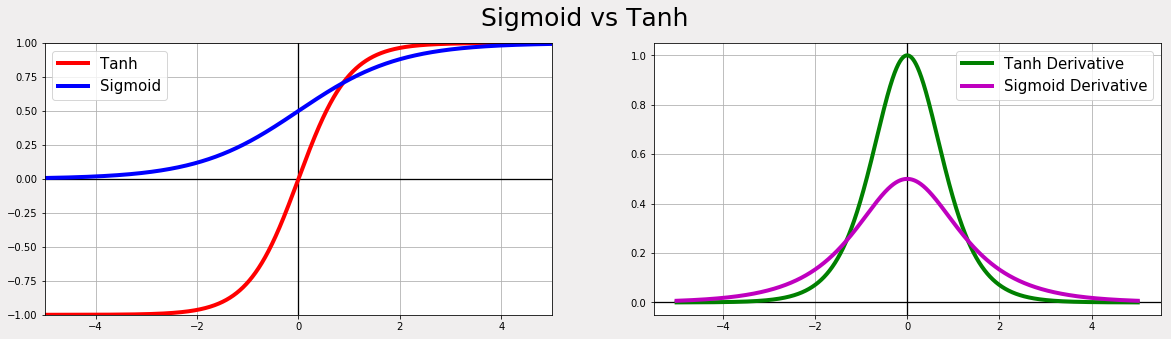

In [403]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(1, 2, figsize=(20,5), facecolor='#F0EEEE')

# Functions Axes Lines
ax[0].axvline(linewidth=1.3, color='k')
ax[0].axhline(linewidth=1.3, color='k')

# Derivatives Axes Lines
ax[1].axvline(linewidth=1.3, color='k')
ax[1].axhline(linewidth=1.3, color='k')

x = np.arange(-5,5,.0001)
# y = tanh, z = sigmoid
y = np.tanh(x)
z = 1 / (1 + np.exp(-x))

# Plot Activation Functions
ax[0].plot(x, y, linewidth=4, color='r', label='Tanh')
ax[0].plot(x, z, linewidth=4, color='b', label='Sigmoid')

# Derivative Equations
tanh_deriv = (1 - tanh(x)**2)
sig_deriv = np.exp(-x) / (1 + np.exp(-x)**2)

# Plot Derivatives
ax[1].plot(x, tanh_deriv,linewidth=4, color='g', label='Tanh Derivative')
ax[1].plot(x, sig_deriv,linewidth=4, color='m', label='Sigmoid Derivative')

# Main Title
fig.suptitle("Sigmoid vs Tanh", fontsize=25)

# Grid
ax[0].grid(True)
ax[1].grid(True)

# Legend
ax[1].legend(fontsize=15)
ax[0].legend(fontsize=15)
# First Graph Limits (looks prettier)
ax[0].set_xlim(-5, 5)
ax[0].set_ylim(-1, 1)

plt.show()

As mentioned earlier, the hyperbolic tangent function shares an S-shape curve with the sigmoid function. The left plot will show the ranges of the two activation functions, and will also show that the hyperbolic tangent function is centered around zero, while the sigmoid function is not. Notice that the sigmoid function cannot go into the negatives. This means that all negative inputs will be mapped to zero because the sigmoid function is not able to go any lower than zero. The right plot will show the stronger derivative that the hyperbolic tangent function has over the sigmoids less pronounced derivative.